<a href="https://colab.research.google.com/github/RLZNMVN/ssDL/blob/main/FMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [15]:
import os
# 경로 설정
train_with_mask_path = '/content/drive/Othercomputers/내 노트북/Downloads/FMC/Face Mask Dataset/Train/WithMask/'
train_without_mask_path = '/content/drive/Othercomputers/내 노트북/Downloads/FMC/Face Mask Dataset/Train/WithoutMask/'
test_with_mask_path = '/content/drive/Othercomputers/내 노트북/Downloads/FMC/Face Mask Dataset/Test/WithMask/'
test_without_mask_path = '/content/drive/Othercomputers/내 노트북/Downloads/FMC/Face Mask Dataset/Test/WithoutMask/'
print(test_with_mask_path[0:10])
print(test_without_mask_path[0:10])

/content/d
/content/d


In [28]:
print("Number of with mask images: ",len(test_with_mask_path))
print("Number of without mask images: ",len(test_without_mask_path))
print("Total Number of Images: ", len(test_with_mask_path) + len(test_without_mask_path))

Number of with mask images:  82
Number of without mask images:  85
Total Number of Images:  167


In [29]:
# with mask -> 1
# without mask -> 0
# 4 images
# 2. face mask.jpg , face mask.jpg [1,1]
# 2. face without mask.jpg, face without mask.jpg [0,0]
# [0.5, 0.7, 0.8 ....] [1]
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3827
len(with_mask_labels)
len(without_mask_labels)

3827

In [30]:
labels = with_mask_labels + without_mask_labels
labels[-2]
len(labels)

7552

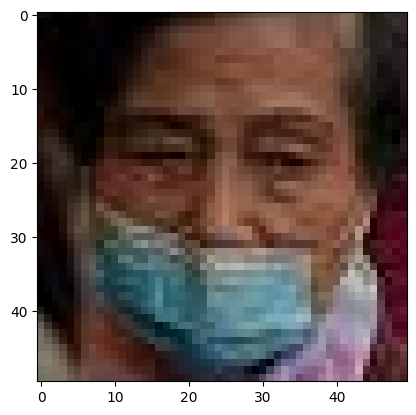

In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# with mask
img = mpimg.imread('/content/drive/Othercomputers/내 노트북/Downloads/FMC/Face Mask Dataset/Train/WithMask/1004.png')
imgplot = plt.imshow(img)
plt.show()

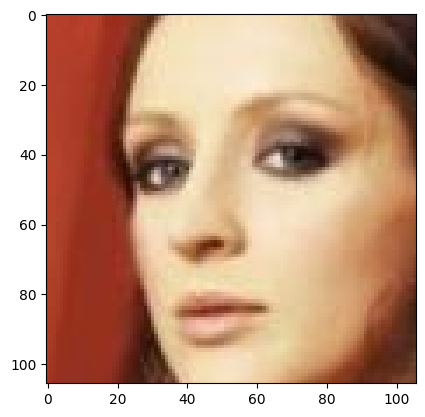

In [32]:
# without mask
img = mpimg.imread('/content/drive/Othercomputers/내 노트북/Downloads/FMC/Face Mask Dataset/Train/WithoutMask/100.png')
imgplot = plt.imshow(img)
plt.show()

Train data shape: (10000, 128, 128, 3)
Train labels shape: (10000,)
Test data shape: (992, 128, 128, 3)
Test labels shape: (992,)
Sample training images:


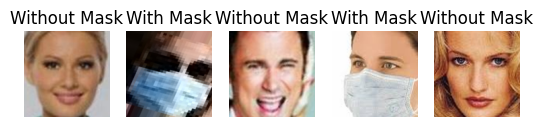

Sample testing images:


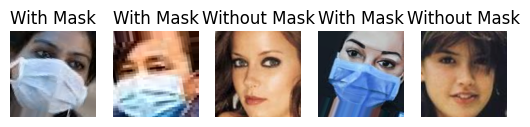

In [33]:
def load_images(path, label):
    images = []
    labels = []
    for img_file in os.listdir(path):
        img_path = os.path.join(path, img_file)
        try:
            image = Image.open(img_path)
            image = image.resize((128, 128))
            image = image.convert('RGB')
            image = np.array(image)
            images.append(image)
            labels.append(label)
        except Exception as e:
            print(f"Error processing {img_file}: {str(e)}")
    return images, labels

# 훈련 데이터 로드
train_with_mask, train_with_mask_labels = load_images(train_with_mask_path, 1)
train_without_mask, train_without_mask_labels = load_images(train_without_mask_path, 0)

# 테스트 데이터 로드
test_with_mask, test_with_mask_labels = load_images(test_with_mask_path, 1)
test_without_mask, test_without_mask_labels = load_images(test_without_mask_path, 0)

# 데이터 합치기
X_train = np.array(train_with_mask + train_without_mask)
y_train = np.array(train_with_mask_labels + train_without_mask_labels)
X_test = np.array(test_with_mask + test_without_mask)
y_test = np.array(test_with_mask_labels + test_without_mask_labels)

# 데이터 셔플
train_indices = np.arange(len(X_train))
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

test_indices = np.arange(len(X_test))
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# 샘플 이미지 시각화
def plot_samples(X, y, n=5):
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X[i])
        plt.title('With Mask' if y[i] == 1 else 'Without Mask')
        plt.axis('off')
    plt.show()

print("Sample training images:")
plot_samples(X_train, y_train)

print("Sample testing images:")
plot_samples(X_test, y_test)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = "sigmoid"))

In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 237s 830ms/step - acc: 0.7512 - loss: 30.4929 - val_acc: 0.7440 - val_loss: 0.5366
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 239s 849ms/step - acc: 0.7620 - loss: 0.5171 - val_acc: 0.7720 - val_loss: 0.5326
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 259s 839ms/step - acc: 0.8191 - loss: 0.4543 - val_acc: 0.8790 - val_loss: 0.3183
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 256s 819ms/step - acc: 0.9006 - loss: 0.2917 - val_acc: 0.7830 - val_loss: 0.5767
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 264s 825ms/step - acc: 0.7427 - loss: 0.5739 - val_acc: 0.8990 - val_loss: 0.3851


...처음 epoch 5일떄는 0.96이었는데 성능 무슨일....?

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - acc: 0.8989 - loss: 0.3975


In [38]:
print("Loss is: ",loss)
print("Accuracy is: ",accuracy)

Loss is:  0.3753420114517212
Accuracy is:  0.899193525314331


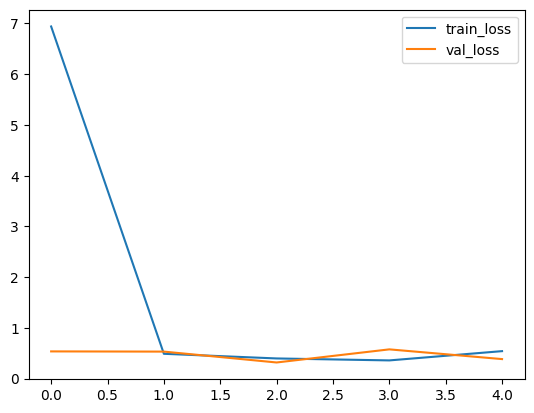

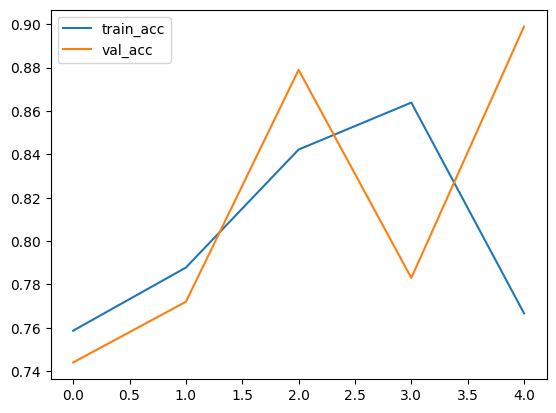

In [39]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()

In [40]:
model.save("model.h5")



---





---



1차: epoch 5

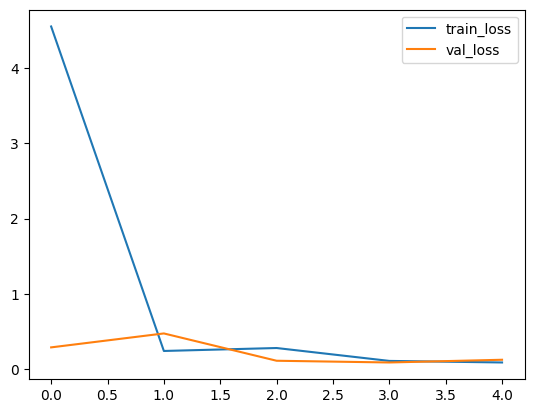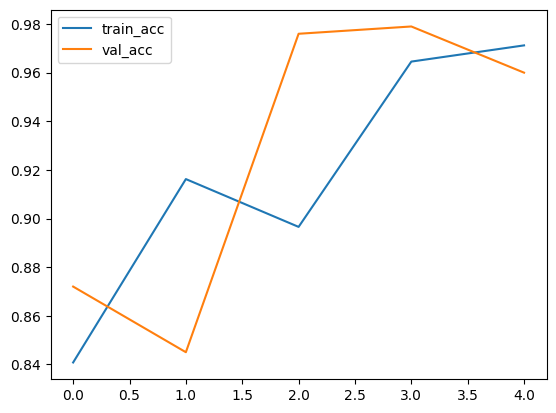

2차: epoch 10 / 성능을 늘리고자 하였으나 과적합 추정



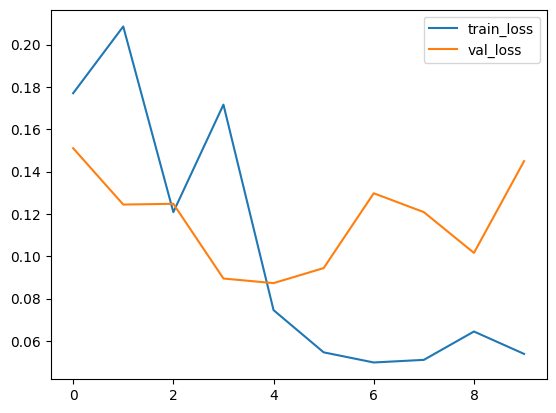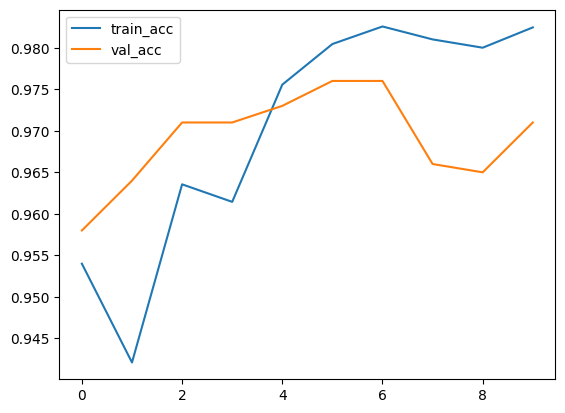

데이터셋 증강이 성능 개선에 도움이 되겠다고 판단하여 증강 예정(현단계)